# **Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing for Mall Customers Dataset**

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Mall Customers dataset
mall_data = pd.read_csv('/content/drive/MyDrive/archive (1).zip')

# Check for missing values
print(mall_data.isnull().sum())

# Encode nominal data (Gender)
le = LabelEncoder()
mall_data['Gender'] = le.fit_transform(mall_data['Gender'])  # Male=1, Female=0

# Standardize interval data
scaler = StandardScaler()
mall_data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]
)

print(mall_data.head())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19           -1.738999               -0.434801
1           2       1   21           -1.738999                1.195704
2           3       0   20           -1.700830               -1.715913
3           4       0   23           -1.700830                1.040418
4           5       0   31           -1.662660               -0.395980


# **Unsupervised Learning and Validation**

Silhouette Score: 0.46658474419000145


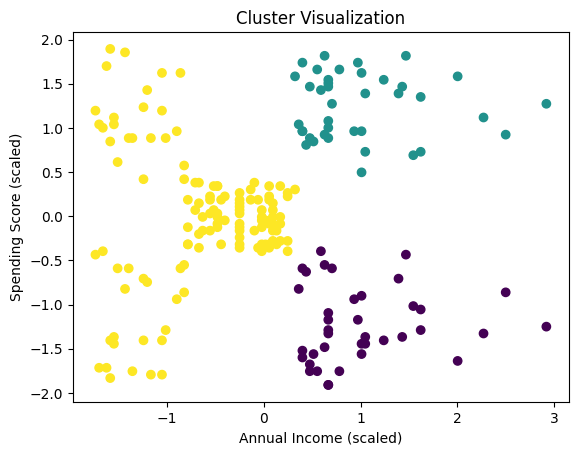

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(mall_data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Add clusters to the dataset
mall_data['Cluster'] = clusters

# Silhouette Score
sil_score = silhouette_score(mall_data[['Annual Income (k$)', 'Spending Score (1-100)']], clusters)
print(f"Silhouette Score: {sil_score}")

# Visualization
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# **Feature Selection**

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = mall_data['Cluster']
selected_features = SelectKBest(score_func=f_classif, k=2).fit(X, y)

# Selected feature indices
print("Selected Features:", selected_features.get_support(indices=True))

Selected Features: [1 2]


# **Supervised Learning**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Results for Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00         9
           2       0.97      1.00      0.99        36

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[14  0  1]
 [ 0  9  0]
 [ 0  0 36]]
Results for Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      1.00      0.95         9
           2       1.00      0.97      0.99        36

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[15  0  0]
 [ 0  9  0]
 [ 0  1 35]]
Results for SVM
Clas

# **Manual Feature Extraction for Iris Dataset**

In [9]:
import pandas as pd
import zipfile

# Path to the ZIP file
zip_file_path = '/content/drive/MyDrive/iris.zip'

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    z.extractall('/content/iris_data')  # Extract contents to a folder

# Load the specific file (iris.data)
iris_data = pd.read_csv('/content/iris_data/iris.data', header=None)

# Add column names based on the Iris dataset structure
iris_data.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

# Map target to numerical labels if needed
iris_data['target'] = iris_data['target'].astype('category').cat.codes

print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# **Automated Feature Extraction**

In [10]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# PCA for dimensionality reduction
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data.iloc[:, :-1])
print("PCA Components:\n", iris_pca[:5])

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2)
rfe.fit(iris_data.iloc[:, :-1], iris_data['target'])
print("Selected Features by RFE:", rfe.support_)

PCA Components:
 [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]
Selected Features by RFE: [False False  True  True]
